In [1]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


In [2]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

print(movies.head())
print(ratings.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523


In [3]:

movie_data = pd.merge(ratings, movies, on='movieId')

movie_data.head()



,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [4]:
print(movie_data.isnull().sum())

movie_data.dropna(inplace=True)


userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [5]:
popular_movies = movie_data.groupby('title').size().sort_values(ascending=False).head(10)
print(popular_movies)


title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
Star Wars: Episode IV - A New Hope (1977)    273
Matrix, The (1999)                           261
Terminator 2: Judgment Day (1991)            253
Schindler's List (1993)                      248
Braveheart (1995)                            248
dtype: int64


In [6]:

rating_counts = movie_data.groupby('title').size().reset_index(name='rating_count')
average_ratings = movie_data.groupby('title')['rating'].mean().reset_index(name='avg_rating')
popularity_df = pd.merge(rating_counts, average_ratings, on='title')
filtered_popular = popularity_df[popularity_df['rating_count'] >= 100]
top_movies = filtered_popular.sort_values(by='avg_rating', ascending=False).head(10)
print(top_movies)


                                       title  rating_count  avg_rating
8136        Shawshank Redemption, The (1994)           308    4.454545
3682                   Godfather, The (1972)           210    4.392857
9658              Usual Suspects, The (1995)           228    4.328947
6137  Monty Python and the Holy Grail (1975)           154    4.301948
7950                 Schindler's List (1993)           248    4.296371
6719  One Flew Over the Cuckoo's Nest (1975)           143    4.272727
3114                            Fargo (1996)           201    4.271144
5877                      Matrix, The (1999)           261    4.264368
3683          Godfather: Part II, The (1974)           140    4.260714
3755                       Goodfellas (1990)           135    4.259259


In [7]:
from google.colab import files
uploaded = files.upload()


Saving movies.csv to movies (1).csv
Saving ratings.csv to ratings (1).csv


In [8]:
import pandas as pd
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
movie_data = pd.merge(ratings, movies, on='movieId')


In [9]:
user_movie_matrix = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_matrix.fillna(0, inplace=True)


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(user_movie_matrix)
similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)


In [11]:
def get_movie_recommendations(movie_name, top_n=5):
    if movie_name not in user_movie_matrix.columns:
        return f"'{movie_name}' not found in dataset. Please check spelling or try another movie."
    users_who_rated = user_movie_matrix[user_movie_matrix[movie_name] > 0]
    if users_who_rated.empty:
        return f"No user ratings found for '{movie_name}'"
    sample_user = users_who_rated.index[0]
    similar_users = similarity_df[sample_user].sort_values(ascending=False)
    similar_users = similar_users.drop(sample_user)
    top_users = similar_users.head(10).index
    recommended_scores = user_movie_matrix.loc[top_users].mean().sort_values(ascending=False)
    recommended_movies = recommended_scores.drop(movie_name).head(top_n)
    return recommended_movies


In [19]:

movie_input = input("Enter a movie you like: ")
recommendations = get_movie_recommendations(movie_input)
print("\nTop Recommended Movies:")
print(recommendations)


Enter a movie you like: Forrest Gump

Top Recommended Movies:
("'Forrest Gump' not found", [])


In [13]:
# Visualize the top 10 most rated movies using a bar chart.

/tmp/ipython-input-255753209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_movies, x='rating_count', y='title', palette='viridis')


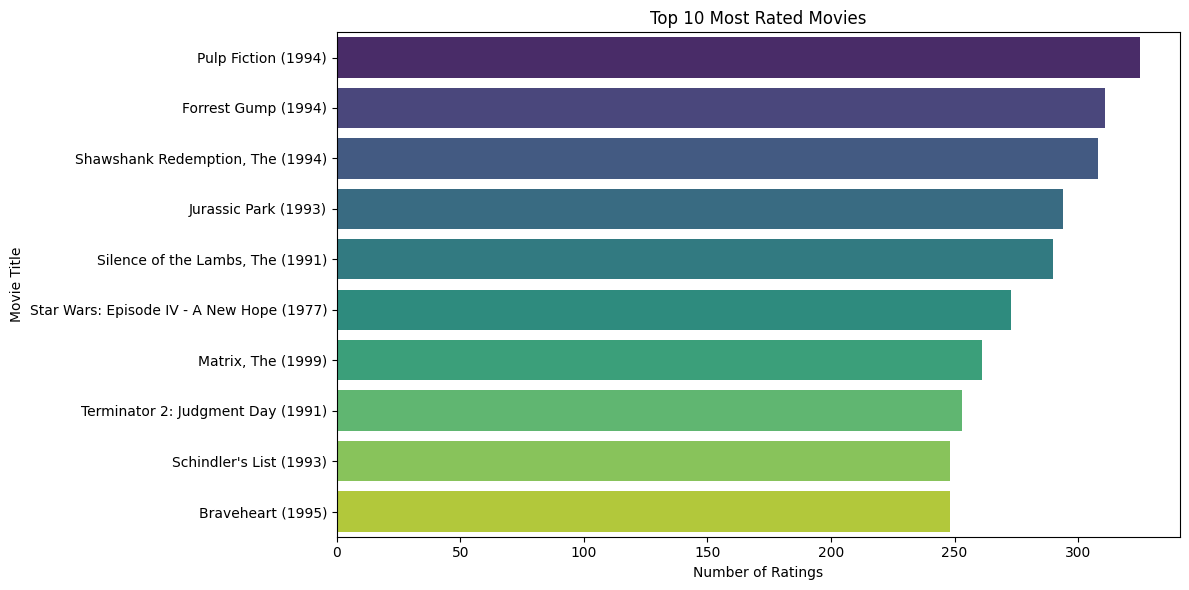

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
movie_rating_count = movie_data.groupby('title').size().reset_index(name='rating_count')
top_rated_movies = movie_rating_count.sort_values('rating_count', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_rated_movies, x='rating_count', y='title', palette='viridis')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()


In [15]:
from google.colab import files
uploaded = files.upload()


Saving movies.csv to movies (2).csv
Saving ratings.csv to ratings (2).csv


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
movie_data = pd.merge(ratings, movies, on='movieId')
user_movie_matrix = movie_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)
similarity_df = pd.DataFrame(
    cosine_similarity(user_movie_matrix),
    index=user_movie_matrix.index,
    columns=user_movie_matrix.index
)
def get_movie_recommendations(movie_name, top_n=5):
    if movie_name not in user_movie_matrix.columns:
        return f"'{movie_name}' not found", []

    sample_users = user_movie_matrix[user_movie_matrix[movie_name] > 0].index
    if len(sample_users) == 0:
        return f"No ratings found for '{movie_name}'", []

    sample_user = sample_users[0]
    similar_users = similarity_df[sample_user].sort_values(ascending=False)[1:11]
    top_users = similar_users.index

    mean_ratings = user_movie_matrix.loc[top_users].mean().sort_values(ascending=False)
    mean_ratings = mean_ratings.drop(movie_name)
    recommendations = mean_ratings.head(top_n).reset_index()
    recommendations.columns = ['Movie', 'Predicted Rating']
    return "Top 5 Recommended Movies:", recommendations
def plot_top_rated_movies():
    top_rated = movie_data.groupby('title').size().reset_index(name='rating_count')
    top10 = top_rated.sort_values('rating_count', ascending=False).head(10)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.barh(top10['title'], top10['rating_count'], color='orange')
    ax.set_xlabel("Number of Ratings")
    ax.set_title("Top 10 Most Rated Movies")
    ax.invert_yaxis()
    return fig


In [17]:
import gradio as gr

def recommend_and_plot(movie_input):
    msg, table = get_movie_recommendations(movie_input)
    fig = plot_top_rated_movies()
    return msg, table, fig

gr.Interface(
    fn=recommend_and_plot,
    inputs=gr.Textbox(label="Enter a Movie You Like"),
    outputs=[
        gr.Textbox(label="Status"),
        gr.Dataframe(label="Recommended Movies"),
        gr.Plot(label="Top 10 Most Rated Movies")
    ],
    title="🎬 Movie Recommender System (Collaborative Filtering)",
    description="Enter a movie name and get recommendations based on similar users' preferences. Also shows a chart of the most popular movies."
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0fcae5bf7f2846c813.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
